<div style="text-align: left; font-size: 16px;">
    <div style="text-align: left; display: inline-block; line-height: 2;">
        <ul style="list-style-type: none; padding: 0;">
            <li>RMIT UNIVERSITY VIETNAM</li>
            <li>School of Science, Engineering and Technology (SSET)</li>
            <li>COSC2968 | COSC3053 - Foundations of AI for STEM</li>
        </ul>
    </div>
</div>

<div style="text-align: center; font-size: 24px; margin-bottom: 5px; margin-top: 0px">
    <strong style="color: red;">Assignment 2 - OPTION A (PROGRAMMING): Classical AI</strong>
</div>

<div style="text-align: center; font-size: 20px; margin-bottom: -10px">
    <div style="text-align: center; display: inline-block; line-height: 2;">
        <ul style="list-style-type: none; padding: 0;">
            <li><strong>- Lecture:</strong> Dr. Nhat-Quang Tran and Ms. Anh Van Le</li>
            <li><strong>- Student:</strong> Tran Dong Nghi - S3914633</li>
            <li><strong>- Submission Due Date:</strong> 14.08.2024</li>
        </ul>
    </div>
</div>

<p style="text-align: center; font-size:16px; margin-left: 20px; line-height: 1.7; margin-top: -5px; margin-right: 30px;"><i>"I declare that in submitting all work for this assessment I have read, understood, and agree to the content and expectations of the <a href="https://www.rmit.edu.au/students/my-course/assessment-results/assessment" target="_blank">Assessment declaration</a>."</i></p>

# 1. INTRODUCTION

<p style="text-align: justify; font-size:16px; margin-left: 20px; line-height: 1.7; margin-right: 30px; margin-top: 5px">- <strong>Assignment 2 - OPTION A (PROGRAMMING): Classical AI</strong>, provided by the Foundations of AI for STEM course, offers an <strong>AI-Driven Drone Delivery Optimization</strong> challenge. This assignment requires the application of the A* algorithm to find a path that helps the drone drones deliver goods through cities with many obstacles <strong>[1]</strong>.</p>

<p style="text-align: justify; font-size:16px; margin-left: 20px; line-height: 1.7; margin-right: 30px; margin-top: -10px">- <strong>Problem Statement</strong>: It is required to design 2-3 maps for the city, including both empty spaces and obstacles. Then, <strong>using Python to implement the Heuristic function</strong>, describing and explaining choices. The next step involves <strong>implementing the A* algorithm</strong> in Python. It is crucial to explain each step with comments while writing the code. Finally, the map must be <strong>tested with 2-3 different maps</strong> and <strong>analyzed for effectiveness</strong>. Adding delivery instructions after finding the route can enhance visualization <strong>[1]</strong>.</p>

<p style="text-align: justify; font-size:16px; margin-left: 20px; line-height: 1.7; margin-right: 30px; margin-top: -10px">- In this Jupyter Notebook, all the contents are well organized and presented, including Map Representation, Heuristic Function, A* Algorithm Implementation and Evaluation. In addition, there is a detailed guide for each code section, highlighting the main contents as well as additional functions. In particular, this notebook file provides a section for further explanations, tutorials and problem reflection. After all, the complete code is presented for testing, followed by the reference section.</p>

<p style="text-align: justify; font-size:16px; margin-left: 20px; line-height: 1.7; margin-right: 30px; margin-top: -10px; margin-bottom: -10px">- Throughout the process, Visual Studio Code will be used for programming and presentation, while Python and HTML will support formatting and developing algorithm. The goal is to master Python, develop the A* algorithm, and apply it to real-world situations. This knowledge is taught in weeks 3 and 4 and will be applied to Assignment 2 - OPTION A (PROGRAMMING): Classical AI.</p>

# 2. LIBRARY and INSTRUCTION

<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: -10px; line-height: 1.7; margin-right: 30px">- Before starting the main program, the program will display a short introduction as well as some symbols that the map will use using the <strong>'display_instructions()'</strong> function.</p>

<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: -10px; line-height: 1.7; margin-bottom: -10px; margin-right: 30px">- At the end of the instructions, the user needs to press enter to continue, which ensures that they have read and understood the instructions.</p>

In [1]:
def display_instructions():
    # Define the instructions to be displayed
    instructions = """
                                *** Program Usage Instructions ***    
    This program will find the path from the starting point to the ending point on the city map.

    Symbols:        '#' = Obstacle            '.' = Path

    The program will display the map with the found path. 
    Please install matplotlib for best experience. Open Terminal -> Enter "pip install matplotlib".
    
    Press Enter to continue...
    """
    print(instructions) # Print the instructions
    input() # Wait for user to press Enter

<p style="text-align: justify; font-size:16px; margin-left: 20px; line-height: 1.7; margin-right: 30px; margin-top: -10px; margin-bottom: -10px">- To support the processes taking place in the program, the following are some libraries that need to be imported:</p>

In [2]:
import heapq  # Priority queue operations
import time  # Time functions
import math  # Mathematical functions
import matplotlib.pyplot as plt  # Plotting and visualization
import numpy as np  # Numerical operations with arrays
from matplotlib.ticker import MultipleLocator, FormatStrFormatter  # Custom axis formatting and grid spacing
# Display plots inline in Jupyter Notebook
%matplotlib inline  
from matplotlib.gridspec import GridSpec
from IPython.display import display, clear_output  # Display and clear output in Jupyter Notebook

# 3. MAP REPRESENTATION
## a. Code Explanation

<p style="text-align: justify; font-size:16px; margin-left: 20px; line-height: 1.7; margin-right: 30px; margin-top: -10px">In general, the <strong>ChooseMap()</strong> function allows the user to choose one of the three defined maps by printing the layout of all three maps and requesting user input. In specifically, the <strong>ChooseMap()</strong> function includes the following parts:</p>

<p style="text-align: justify; font-size:16px; margin-left: 20px; line-height: 1.7; margin-right: 30px; margin-top: -10px;">- <strong>Define map</strong>: A dictionary name <strong>'maps'</strong> consists of three 10x10 maps. Each map includes <strong>'name'</strong> and <strong>'data'</strong> key. The map names are numbered from 1 to 3 for easy selection. In addition, they are built in 2D format, including <strong>'#'</strong> representing obstacles and <strong>'.'</strong> representing empty space.</p>

<p style="text-align: justify; font-size:16px; margin-left: 20px; line-height: 1.7; margin-right: 30px; margin-top: -10px;">- <strong>Display map</strong>: With the desire to bring convenience when comparing, the map will print a friendly - message suggesting to open Visual Studio Code in <strong>FULL-SCREEN</strong> and print all three maps side by side.</p>

<p style="text-align: justify; font-size:16px; margin-left: 20px; line-height: 1.7; margin-right: 30px; margin-top: -10px">- <strong>Select map</strong>: the user is prompted to choose the desired city map.</p>
<p style="text-align: justify; font-size:16px; margin-left: 40px; line-height: 1.7; margin-right: 30px; margin-top: -10px">+ In case the user enters an <strong>valid</strong> input, the function will print the selected map for the user to choose the necessary points <i>(which will be discussed in the following sections)</i></p>
<p style="text-align: justify; font-size:16px; margin-left: 40px; line-height: 1.7; margin-right: 30px; margin-top: -10px; margin-bottom: -10px">+ In case the user enters <strong>invalid</strong> input or <strong>blank</strong>, the function will display a message and ask the user to re-enter until receiving valid input.</p>

## b. Code Extension

<p style="text-align: justify; font-size:16px; margin-left: 20px; line-height: 1.7; margin-top: -10px; margin-right: 30px">- To increase user-friendliness, an extension has been built. After the user selects a map, the program will reprint the map the user has just selected. This provides friendliness when supporting the delivery location selection.</p>

<p style="text-align: justify; font-size:16px; margin-left: 20px; line-height: 1.7; margin-top: -10px; margin-right: 30px; margin-bottom: -10px">- The code to reprint the map is written in the main function, which will be discussed in more detail later.</p>

<p style="text-align: justify; font-size:16px; margin-left: 20px; line-height: 1.7; margin-right: 30px; margin-bottom: -10px">- In addition, to develop and increase the optimization of the program, a <strong>'CityMap'</strong> class was created. This class is used to contain map objects, including a 2D map, a starting point, a list of delivery points, and a final delivery point.</p>

## c. Code Implementation

In [3]:
# Initialize city map
class CityMap:
    # Initialize the city map with a matrix, starting point, and delivery points
    def __init__(self, map_matrix, start, deliveries):
        self.map_matrix = [[0 if cell == '.' else 1 for cell in row] for row in map_matrix] # Convert map matrix: '.' to 0, others to 1
        self.start = start              # Start node
        self.deliveries = deliveries    # List of delivery points
        self.end = deliveries[-1]       # End node: Final delivery point

    # Provide a string representation of the city map instance for easier debugging
    def __repr__(self):
        # Returns a string representing the CityMap object, displaying the start point, end point and delivery points.
        return f"CityMap(start={self.start}, end={self.end}, deliveries={self.deliveries})"

In [4]:
def ChooseMap():
    """Prints three maps and lets the user choose one"""
    # Define maps with names and data
    maps = {
        1: {'name': 'Map 1', 'data': [  # Map 1
            ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],  
            ['.', '.', '.', '.', '#', '#', '#', '#', '.', '.'],  
            ['.', '.', '.', '.', '.', '.', '.', '#', '.', '.'],  
            ['.', '#', '#', '#', '#', '.', '.', '#', '.', '.'],  
            ['.', '.', '.', '.', '.', '.', '.', '#', '.', '.'],  
            ['.', '.', '.', '.', '.', '#', '#', '#', '.', '.'],  
            ['.', '#', '#', '#', '.', '#', '.', '.', '.', '.'],  
            ['.', '.', '.', '#', '.', '.', '.', '.', '.', '.'],  
            ['.', '.', '.', '.', '.', '.', '#', '#', '#', '.'],  
            ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
        ]},
        2: {'name': 'Map 2', 'data': [  # Map 2
            ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],  
            ['.', '.', '.', '.', '.', '#', '.', '.', '.', '.'],  
            ['.', '#', '.', '.', '.', '#', '#', '#', '#', '.'],  
            ['.', '#', '.', '.', '.', '#', '.', '.', '.', '.'],  
            ['.', '#', '#', '#', '#', '#', '.', '.', '.', '.'],  
            ['.', '.', '.', '#', '.', '.', '.', '.', '.', '.'],  
            ['.', '.', '.', '#', '.', '.', '.', '.', '.', '.'],  
            ['.', '.', '.', '#', '.', '.', '#', '.', '.', '.'],  
            ['.', '.', '.', '.', '.', '.', '#', '.', '.', '.'],  
            ['.', '.', '.', '.', '.', '.', '#', '.', '.', '.']
        ]},
        3: {'name': 'Map 3', 'data': [  # Map 3
            ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],  
            ['.', '#', '#', '.', '.', '.', '#', '.', '.', '.'],  
            ['.', '.', '.', '.', '#', '#', '.', '.', '#', '.'],  
            ['.', '#', '.', '#', '#', '.', '.', '#', '.', '.'],  
            ['.', '.', '.', '.', '#', '#', '.', '.', '.', '.'],  
            ['.', '#', '.', '.', '.', '.', '#', '#', '.', '.'],  
            ['.', '#', '.', '#', '.', '#', '.', '.', '.', '.'],  
            ['.', '.', '#', '.', '.', '.', '#', '#', '#', '.'],  
            ['.', '.', '.', '#', '.', '.', '.', '.', '.', '.'],  
            ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
        ]}
    }

    print("\nPLEASE OPEN VISUAL STUDIO CODE WINDOW IN FULL SCREEN FOR THE BEST EXPERIENCE")
    for map_number in maps:
        print(maps[map_number]['name'], end=':                  ')  # Print map names
    print()

    # Print maps in horizontal layout
    for row_index in range(len(maps[1]['data'])):
        for map_number in maps:
            row = maps[map_number]['data'][row_index]
            print(f"|{' '.join(row)}|", end='  ' if map_number < len(maps) else '\n')

    # Get and validate user input
    choice = 0
    while (choice not in maps) or (choice == 0):
        choice = int(input("Enter the number of the map you want to choose (1, 2, or 3): "))

        # Return chosen map data
        if choice in maps:
            return choice, maps[choice]['data']

# 4. HEURISTIC FUNCTION
## a. Overview of Heuristic Function

<div style="text-align: left; font-size: 18px; margin-top: -5px; margin-left:20px">
    <strong>i. Heuristic and Functional Functions</strong>
</div>

<p style="text-align: justify; font-size:16px; margin-left: 40px; margin-top: 7px; line-height: 1.7; margin-right: 30px">- In the <strong>AI-Driven Drone Delivery Optimization challenge, the Chebyshev distance is the preferred heuristic function</strong>. "Chebyshev distance is a metric defined on a vector space where the distance between two vectors is the greatest of their differences along any coordinate dimension." <strong>[5, p. 3]</strong>. Chebyshev distance calculates the minimum number of steps to reach a destination, is relatively efficient in finding paths for grid maps, and is particularly flexible in that it can consider horizontal, vertical, and diagonal dimensions.</p>

<p style="text-align: justify; font-size:16px; margin-left: 40px; margin-top: -10px;">- The Chebyshev distance formula is as follows:</p>

<p style="text-align: center; font-size:20px; margin-top: -5px; letter-spacing: 0px;"><strong>max = (|x2 - x1|, |y2 - y1|)</strong></p>

<div style="text-align: left; font-size: 18px; margin-top: -10px; margin-left:20px">
    <strong>ii. Justification for Choosing the Heuristic Function</strong>
</div>

<p style="text-align: justify; font-size:16px; margin-left: 40px; margin-top: 7px; line-height: 1.7; margin-right: 30px">- There are many options for heuristic functions for calculating distances, but Chebyshev is the top choice for this challenge. Some of the reasons why this measure was chosen are as follows:</p>

<p style="text-align: justify; font-size:16px; margin-left: 60px; margin-top: -10px; line-height: 1.7; margin-right: 30px">+ <strong>Guaranteed</strong>: the measure always gives an estimated cost to the target node that is less than or equal to the cost to the children node to the target. This property ensures the <strong>consistency [2]</strong> of the A* algorithm.</p>

<p style="text-align: justify; font-size:16px; margin-left: 60px; margin-top: -10px; line-height: 1.7; margin-right: 30px">+ <strong>Optimality</strong>: Chebyshev distance ensures that the estimated cost is never too high compared to the actual cost, meeting the <strong>admissibility [2] </strong>properties of the A* algorithm.</p>

<p style="text-align: justify; font-size:16px; margin-left: 60px; margin-top: -10px; line-height: 1.7; margin-right: 30px">+ <strong>Superiority</strong>: Euclidean distance measures straight-line distance and is best for non-grid maps, while Manhattan distance is good for grid maps but ignores cross-grid movement. Chebyshev distance works well when cross-grid movement and grid movement have the same cost.</p>

<div style="text-align: left; font-size: 18px; margin-top: -5px; margin-left:20px">
    <strong>iii. Limits of Chebyshev distance</strong>
</div>

<p style="text-align: justify; font-size:16px; margin-left: 40px; margin-top: 7px; line-height: 1.7; margin-right: 30px">Although the Chebyshev distance shows the optimality in the AI-Driven Drone Delivery Optimization challenge, there are still many limitations.</p>

<p style="text-align: justify; font-size:16px; margin-left: 40px; margin-top: -10px; line-height: 1.7; margin-right: 30px">- <strong>Cost assumptions</strong>: The Chebyshev distance assumes that the cost of moving diagonally is the same as the cost of moving vertically or horizontally, which is not true in reality. Therefore, the Chebyshev distance may not accurately reflect the actual cost.</p>

<p style="text-align: justify; font-size:16px; margin-left: 40px; margin-top: -10px; line-height: 1.7;">- <strong>Unstable optimality</strong>:</p>

<p style="text-align: justify; font-size:16px; margin-left: 60px; margin-top: -10px; line-height: 1.7; margin-right: 30px">+ Non-uniform moving cost of the map: For maps with unstable moving costs (maps with many terrains), the Chebyshev distance may not be suitable.</p>

<p style="text-align: justify; font-size:16px; margin-left: 60px; margin-top: -10px; line-height: 1.7; margin-right: 30px">+ Non-grid environment: Assuming the environment does not allow moving diagonally, the Chebyshev distance may not be suitable, the remaining two types of distances need to be considered.</p>

<p style="text-align: justify; font-size:16px; margin-left: 60px; margin-top: -10px; line-height: 1.7; margin-right: 30px">+ Multidimensional environments: In the case of high-dimensional environments (3D,...), the Chebyshev distance will become complex and unintuitive, and pathfinding may be affected.</p>

<p style="text-align: justify; font-size:16px; margin-top: -10px; line-height: 1.7; margin-right: 30px">In summary, <strong>Chebyshev distance is chosen as the heuristic function in the AI-Driven Drone Delivery Optimization challenge</strong> because it meets the requirements of the problem and provides assurance, superiority, and relevance compared to other metrics. However, this method has many limitations when faced with environments with complex cost or space requirements, so it should be considered when using this method for cases outside this challenge.</p>

## b. Code Implementation

<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: 7px; line-height: 1.7; margin-right: 30px;">- In the heuristic function, <strong>'start'</strong> and <strong>'end'</strong> are the coordinates of the current and destination node. Separating the functions makes the problem look simpler and easier to fix when there are errors.</p>

<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: -10px; line-height: 1.7; margin-right: 30px; margin-bottom: -10px">- In addition, calculation functions using euclidean and manhattan formulas are also created for users to compare results.</p>

In [5]:
def Chebyshev(start, end):
    """Calculate the Chebyshev distance between the start and end points"""
    return max(abs(start[0] - end[0]), abs(start[1] - end[1]))

def manhattan(start, end):
    """Calculate the Manhattan distance between the start and end points"""
    return abs(start[0] - end[0]) + abs(start[1] - end[1])

def euclidean(start, end):
    """Calculate the Euclidean distance between the start and end points"""
    return math.sqrt((start[0] - end[0]) ** 2 + (start[1] - end[1]) ** 2)

# 5. A* Algorithm
## a. Overview of A* Algorithm

<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: 7px; line-height: 1.7; margin-right: 30px"><strong>- Definition:</strong> The A* algorithm is an Informed (Heuristic) Search algorithm with main properties such as Optimality, Completeness, Consistent and Admissible Heuristic <strong>[2]</strong></p>

<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: -10px; line-height: 1.7; margin-right: 30px">- The A* algorithm works in a way that always expands the nodes with the minimal f(n) value <strong>[2]</strong>.</p>

<p style="text-align: center; font-size:20px; margin-top: -5px; letter-spacing: 1px;"><strong>f(n) = g(n) + h(n) [2]</strong></p>

<div style="text-align: justify; font-size: 16px; margin-left: 40px; line-height: 2; margin-right: 30px; margin-top: -15px">
    <ul style="list-style-type: none; padding: 0;">
        <li>+ f(n) : estimated cost of the best path that continues from n to a goal <strong>[2]</strong></li>
        <li>+ g(n) : the path cost from the initial state to node n <strong>[2]</strong></li>
        <li>+ h(n) : is admissible, estimated cost of the shortest path from n to a goal state <strong>[2]</strong></li>
    </ul>
</div>

<p style="text-align: justify; font-size:16px; margin-left: 20px; line-height: 1.7; margin-right: 30px; margin-top: -10px"><strong>- Purpose:</strong> For the AI-Driven Drone Delivery Optimization challenge, the A* algorithm is applied to help drones find the most optimal delivery path.</p>

## b. A* Algorithm Implementation

In [6]:
# Path-finding Function using A* Algorithm
def astar(city_map, start, end, heuristic_func):
    map_matrix = city_map.map_matrix  # Convert the city_map object into a matrix
    rows, cols = len(map_matrix), len(map_matrix[0])  # Get the number of rows and columns in the map
    
    start_node = start  # Initialize the start node
    end_node = end  # Initialize the end node
    
    open_list = []  # Initialize the open list to keep track of nodes to be evaluated
    heapq.heappush(open_list, (0, start_node))  # Push the start node onto the open list with a priority of 0
    
    came_from = {}  # Dictionary to track the path (which node each node came from)
    g_score = { (x, y): float('inf') for x in range(rows) for y in range(cols) }  # Initialize g_scores with infinity
    g_score[start_node] = 0  # Set the g_score of the start node to 0
    f_score = { (x, y): float('inf') for x in range(rows) for y in range(cols) }  # Initialize f_scores with infinity
    f_score[start_node] = heuristic_func(start_node, end_node)  # Set the f_score of the start node using the heuristic
    
    while open_list:  # Continue searching while there are nodes to evaluate
        current_node = heapq.heappop(open_list)[1]  # Get the node with the lowest f_score
        
        if current_node == end_node:  # If the current node is the end node, reconstruct the path
            path = []
            while current_node in came_from:  # Trace back the path using came_from
                path.append(current_node)
                current_node = came_from[current_node]
            path.append(start_node)  # Add the start node to the path
            path.reverse()  # Reverse the path to get it from start to end
            return path  # Return the final path
        
        des = [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]  # Possible directions for movement (including diagonals)
        des_man = [(0, -1), (0, 1), (-1, 0), (1, 0)]  # Possible directions for Manhattan distance (no diagonals)
        
        if heuristic_func == manhattan:
            destination = des_man  # Use Manhattan directions if the heuristic is Manhattan distance
        else:
            destination = des  # Otherwise, use all possible directions
        
        for x, y in destination:  # Explore all possible directions
            child_node = (current_node[0] + x, current_node[1] + y)  # Calculate the coordinates of the neighboring node
            
            if 0 <= child_node[0] < rows and 0 <= child_node[1] < cols and map_matrix[child_node[0]][child_node[1]] == 0:
                # Check if the neighboring node is within the grid and not an obstacle
                
                tentative_g_score = g_score[current_node] + 1  # Calculate the tentative g_score for the neighboring node
                
                if tentative_g_score < g_score[child_node]:  # If the tentative g_score is lower than the current g_score
                    came_from[child_node] = current_node  # Update the path
                    g_score[child_node] = tentative_g_score  # Update the g_score for the neighboring node
                    f_score[child_node] = g_score[child_node] + heuristic_func(child_node, end_node)  # Update the f_score
                    
                    if child_node not in [i[1] for i in open_list]:  # If the neighboring node is not in the open list
                        heapq.heappush(open_list, (f_score[child_node], child_node))  # Add it to the open list with its f_score
    
    return None  # If the end node is not reached, return None indicating no path was found

## c. Code Implementation

<div style="text-align: left; font-size: 18px; margin-top: 7px; margin-left:20px">
    <strong>i. Initialization</strong>
</div>

<p style="text-align: justify; font-size:16px; margin-left: 40px; margin-top: 7px; line-height: 1.7; margin-right: 30px;">- After <strong>'map_matrix'</strong> receives the map from the <strong>'city_map'</strong> object, its size is also determined and stored in <strong>'rows'</strong> and <strong>'cols'</strong>. Additionally, the start node (<strong>start_node</strong>) and end node (<strong>end_node</strong>) are set based on the coordinates provided by <strong>'start'</strong> and <strong>'end'</strong>.</p>

<p style="text-align: justify; font-size:16px; margin-left: 40px; margin-top: -10px; line-height: 1.7; margin-right: 30px;">- Initialize a list to contain the nodes that are about to be explored called <strong>'open_list'</strong>. Next, add the starting point as the first element of the list.</p>

<p style="text-align: justify; font-size:16px; margin-left: 40px; margin-top: -10px; line-height: 1.7; margin-right: 30px;">- Camefrom (<strong>came_from = {}</strong>) is a data structure that contains the path that A* algorithm has explored, which will build a complete path from the starting point to the destination point after the algorithm finishes.</p>

<p style="text-align: justify; font-size:16px; margin-left: 40px; margin-top: -10px; line-height: 1.7; margin-right: 30px;">- <strong>'f_score'</strong> - f(n): holds the total estimated cost of the inital point to the current node <strong>[2]</strong></p>

<p style="text-align: justify; font-size:16px; margin-left: 40px; margin-top: -10px; line-height: 1.7; margin-right: 30px;">- <strong>'g_score'</strong> - g(n): holds the path cost from the initial state to the current node <strong>[2]</strong></p>

<div style="text-align: left; font-size: 18px; margin-top: 7px; margin-left:20px">
    <strong>ii. Node Exploration Process</strong>
</div>

<p style="text-align: justify; font-size:16px; margin-left: 40px; margin-top: 7px; line-height: 1.7; margin-right: 30px">- Next, the Astar function continues the while loop to find a flight path for the drone. When there are no more nodes to explore (<strong>'open_list'</strong> is empty) or the current node is the destination, the while loop will stop. In more detail, the while loop works as follows:</p>

<p style="text-align: justify; font-size:16px; margin-left: 40px; margin-top: -10px; line-height: 1.7;">- The <strong>'heappop' function</strong> retrieves the element with the <strong><u>lowest</u> 'f_score' value</strong> in the <strong>'open_list'</strong> and stores it in <strong>'current_node'</strong>.

<p style="text-align: justify; font-size: 16px; margin-left: 40px; margin-top: -10px; line-height: 1.7;">- In the next step, the program performs the destination check.</p>

<p style="text-align: justify; font-size: 16px; margin-left: 40px; margin-top: -10px; line-height: 1.7;">- In case the <strong><u>current node is the goal node</u></strong>: </p>

<p style="text-align: justify; font-size: 16px; margin-left: 60px; margin-top: -10px; line-height: 1.7;">+ The program will initialize an empty list <strong>'path'</strong> to store the drone's path.</p>

<p style="text-align: justify; font-size: 16px; margin-left: 60px; margin-top: -10px; line-height: 1.7;">+ From the current node, the program continuously add that node to <strong>'path'</strong> and goes back to the parent node using <strong>came_from[current_node]</strong>.</p>

<p style="text-align: justify; font-size: 16px; margin-left: 60px; margin-top: -10px; line-height: 1.7;">+ The <strong>'path'</strong> is reversed before returning the value to the function, exiting the loop.</p>

<p style="text-align: justify; font-size: 16px; margin-left: 40px; margin-top: -10px; line-height: 1.7;">
  - In case the <strong>current node <span style="color: #cc3333;"><u>is not</u></span> the goal node</strong>, the for loop with two variables <strong>'x'</strong> and <strong>'y'</strong> will check all surrounding cells <strong>('child_node')</strong> to see if they are within the traversable limit.
</p>

<p style="text-align: justify; font-size: 16px; margin-left: 60px; margin-top: -10px; line-height: 1.7;">+ If the node does not satisfy the condition, the for loop immediately moves to the next node to check</p>

<p style="text-align: justify; font-size: 16px; margin-left: 60px; margin-top: -10px; line-height: 1.7;">+ If the node satisfies the condition, the next step will be to calculate <strong>'g_score(n)'</strong> temporarily.</p>

<p style="text-align: justify; font-size: 16px; margin-left: 60px; margin-top: -10px; margin-right: 30px; line-height: 1.7;">+ Then if the <strong>g_score(child_node)</strong> just calculated is smaller than the value of <strong>g_score(previous_child_node)</strong>, the update will be performed including the path to the child node (<strong>'child_node'</strong>), <strong>'g_score'</strong> and <strong>'f_score'</strong> values ​​for the child node.</p>

<p style="text-align: justify; font-size: 16px; margin-left: 60px; margin-top: -10px; line-height: 1.7;">+ And if this child node is not in the <strong>'open_list'</strong>, the <strong>heapush()</strong> function will push it and its <strong>'f_score'</strong> to the heap.</p>

<div style="text-align: left; font-size: 18px; margin-top: 7px; margin-left:20px">
    <strong>iii. Path Not Found</strong>
</div>

<p style="text-align: justify; font-size:16px; margin-left: 40px; margin-top: 7px; line-height: 1.7;">- If the <strong>'open_list'</strong> is empty and the current node is not the destination, then there is no suitable path for the journey.</p>

<p style="text-align: justify; font-size:16px; margin-left: 40px; margin-top: -10px; line-height: 1.7;">- The <strong>'astar()'</strong> function will return <strong>None</strong> to inform the user that there is no valid result or the program cannot meet the given requirements.</p>

# 6. USER INTERACTION

<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: 15px; line-height: 1.7; margin-right: 30px">- In addition to processing the map and using the A* algorithm to find the flight path, user interaction also plays an important role. Another part that will be discussed is the reception and processing of user input and providing notifications.</p>

<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: -10px; line-height: 1.7; margin-bottom:-15px">- Furthermore, the overall evaluation of the flight path and visualization of the flight path when the user chooses to stop will also be carefully considered. One additional part is to calculate the total path cost using another heuristic function.</p>

## a. Point Validation
<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: -15px; line-height: 1.7; margin-right: 30px">- The <strong>get_point()</strong> function is used to check whether the input is valid or not. Some cases covered by the function are:</p>
<p style="text-align: justify; font-size:16px; margin-left: 40px; margin-top: -10px; line-height: 1.7;">+ Enter coordinates but not 2 numbers at the same time</p>
<p style="text-align: justify; font-size:16px; margin-left: 40px; margin-top: -10px; line-height: 1.7;">+ Coordinates are outside the map</p>
<p style="text-align: justify; font-size:16px; margin-left: 40px; margin-top: -10px; line-height: 1.7;">+ If it is the starting point, the function will have an additional item to check if there is an obstacle</p>
<p style="text-align: justify; font-size:16px; margin-left: 40px; margin-top: -10px; line-height: 1.7;">+ The remaining cases: letters, special characters and all cases that are not 2 numbers</p>

In [7]:
def get_point(prompt, map_limits, map_matrix = None, is_start_point=0):
    while True:
        try:
            # Prompt user to enter coordinates and split the input into integers
            point = tuple(map(int, input(prompt).split()))
            
            # Check if exactly two numbers were entered
            if len(point) != 2:
                raise ValueError("Please enter exactly two numbers.")
                
            x, y = point

            # Check if the coordinates are within the map limits
            if not (0 <= x < map_limits[0]) or not (0 <= y < map_limits[1]):
                raise ValueError(f"Coordinates must be within the map limits (0, 0) to ({map_limits[0]-1}, {map_limits[1]-1}).")

            # If a map matrix is provided and the point is a starting point, check if it is an obstacle
            if map_matrix is not None and is_start_point == 1:
                if map_matrix[x][y] == '#':  # Assuming '#' represents an obstacle
                    print("The starting point is an obstacle. Please choose a different point.")
                    continue

            return point
        except ValueError as e:
            print(f"Invalid input: {e}. Please try again.")

## b. Path Visualization
<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: -15px; line-height: 1.7; margin-right: 30px">- Path visualization plays an important role in demonstrating the quality of the A* algorithm as well as the heuristic function.</p>

<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: -10px; line-height: 1.7;">- For each function, the <strong>visualize_delivery_path()</strong> function will help visualize the path and highlight the delivery order, each function has its own figure.</p>

<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: -10px; line-height: 1.7; margin-bottom: -10px">- In addition, if there is an undeliverable point, the <strong>unable_to_visualize()</strong> function will help display the message on another figure.</p>

In [8]:
def visualize_delivery_path(city_map, paths, name):
    # Figure 1: Display all paths
    fig, ax = plt.subplots(figsize=(8, 6))  # Create a figure and axes for the plot
    
    vis_map = np.array([row[:] for row in city_map.map_matrix])  # Copy the map matrix for visualization
    ax.imshow(vis_map, cmap='gray_r', origin='upper')  # Display the map with a grayscale color map
    ax.set_facecolor('white')  # Set the background color to white

    lines = []
    for path in paths:
        x_coords = [point[1] for point in path]  # Extract x-coordinates from the path
        y_coords = [point[0] for point in path]  # Extract y-coordinates from the path
        line, = ax.plot(x_coords, y_coords, marker='o', linestyle='-', label='Path')  # Plot the path
        lines.append(line)  # Store the line for later highlighting

    sy, sx = city_map.start  # Get the start point coordinates
    ax.scatter(sx, sy, c='green', marker='o', edgecolor='black', s=200, zorder=3, label='Start')  # Mark the start point

    for idx, path in enumerate(paths):
        ey, ex = path[-1]  # Get the end point of each path
        if idx < len(paths) - 1:
            ax.scatter(ex, ey, c='yellow', marker='X', edgecolor='black', s=200, zorder=3, label='Stop')  # Mark intermediate stops
        else:
            ax.scatter(ex, ey, c='red', marker='X', edgecolor='black', s=200, zorder=3, label='End')  # Mark the final destination

    ax.set_xlim(-0.5, 9.5)  # Set x-axis limits
    ax.set_ylim(-0.5, 9.5)  # Set y-axis limits
    ax.invert_yaxis()  # Invert the y-axis to match the grid layout
    ax.xaxis.set_major_locator(MultipleLocator(1))  # Set x-axis grid spacing
    ax.yaxis.set_major_locator(MultipleLocator(1))  # Set y-axis grid spacing
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))  # Format x-axis labels as integers
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))  # Format y-axis labels as integers
    ax.grid(True, which='both', color='gray', linestyle='-', linewidth=0.5)  # Enable grid lines
    
    fig.suptitle(f"Delivery Path Visualization ({name})", fontsize=14, y=0.95)  # Set the title of the figure
    message = f"Please spend at least {2 * len(paths)} seconds to look at the figure. \nRoutes will be highlighted in order of delivery."
    plt.text(0.5, -0.1, message, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=10, color='red')  
    # Display a message below the plot

    plt.pause(1 * len(paths))  # Wait before highlighting paths

    def highlight_path(selected_index):
        for idx, line in enumerate(lines):
            if idx == selected_index:
                line.set_linewidth(4)  # Highlight the selected path
                line.set_color('red')
            else:
                line.set_linewidth(2)  # Dim the non-selected paths
                line.set_color('blue')
        fig.canvas.draw_idle()  # Update the figure display

    for i in range(len(paths)):
        highlight_path(i)  # Highlight each path in order
        plt.pause(1.5)  # Wait before highlighting the next path
        clear_output(wait=True)  # Clear the output to refresh the display
        display(fig)  # Display the updated figure
            
    plt.show()  # Show the final plot

In [9]:
def unable_to_visualize(name, failed):
    # Figure 2: Display a notification for undeliverable path
    fig, ax = plt.subplots(figsize=(6, 2))  # Create a smaller figure to match the message size
    ax.text(0.5, 0.5, f'Unable to visualize delivery path to {failed} using {name}!\nPath is empty or invalid.',
            horizontalalignment='center', verticalalignment='center',
            transform=ax.transAxes, fontsize=14, color='red')  # Display the error message in red with a smaller font size
    ax.axis('off')  # Hide the axes
    plt.show()  # Show the notification

## c. Evaluation Report Generation
<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: -15px; line-height: 1.7; margin-right: 30px">- The <strong>generate_evaluation_report()</strong> function generates an evaluation report table that includes information such as the map number, start point, delivery point, end point, total path cost, and delivery time. </p>

<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: -10px; line-height: 1.7;">- In particular, the table will include data from all three heuristic functions, summarizing the results of the pathfinding and distance calculations.</p>

In [10]:
def process_deliveries(city_map, heuristic, name):
    # Initialize variables for tracking delivery progress
    current_location = city_map.start  # Starting location
    total_path_cost = 0  # Total cost of paths
    execution_times = []  # List of execution times
    paths = []  # List of paths taken
    failed_paths = []
    
    for delivery in city_map.deliveries:
        print()  # Print a blank line for readability
        print(f"Delivering to {delivery}, using {name}...")  # Inform user of current delivery

        start_time = time.time()  # Start timing the delivery process

        path = astar(city_map, current_location, delivery, heuristic)  # Find the best path to the delivery point

        time.sleep(1)  # Pause for clarity

        if path:
            # Calculate and update path cost
            if heuristic == euclidean: 
                path_cost = sum(euclidean(path[i], path[i + 1]) for i in range(len(path) - 1))
            else:
                path_cost = len(path) - 1
            total_path_cost += path_cost
            paths.append(path)  # Store the path
            print(f"Delivered to {delivery}. Path: {path} with path cost: {path_cost:.2f}")

            print()
            end_time = time.time()  # End timing the delivery process
            execution_time = round(end_time - start_time - 1, 4)  # Adjust for sleep delay
            execution_times.append(execution_time)  # Store execution time
            print(f"Time taken: {execution_time:.4f} seconds")  # Show delivery time
            print()

            current_location = delivery  # Update current location
        else:
            print(f"Unable to deliver to {delivery}.")  # Notify if delivery fails
            failed_paths.append(delivery)
            break  # Exit loop if delivery fails

    print()  # Print a blank line for readability
    print(f"Total path cost: {total_path_cost:.2f}")  # Display total path cost

    return total_path_cost, paths, execution_times, failed_paths

In [11]:
def generate_evaluation_report(map_number, city_map, execution_times, path_costs, total):
    
    # Extract data from the city map
    start_point = city_map.start  # Starting point of the delivery
    delivery_point = city_map.deliveries  # List of delivery points
    end_point = city_map.deliveries[-1]  # Final delivery point (end point)

    # Prepare the data for the table
    columns = ['', 'Chebyshev', 'Manhattan', 'Euclidean']  # Column headers
    table_data = [
        ['Map Number', map_number, map_number, map_number],  # Row for the map number
        ['Starting Point', start_point, start_point, start_point],  # Row for the starting point
        ['Delivery Points', delivery_point[:-1], delivery_point[:-1], delivery_point[:-1]],  # Row for delivery points (excluding the last point)
        ['End Point', end_point, end_point, end_point],  # Row for the end point
        ['Total Path Cost', 
         f"{path_costs.get('Chebyshev', 0):.2f}", 
         f"{path_costs.get('Manhattan', 0):.2f}", 
         f"{path_costs.get('Euclidean', 0):.2f}"],  # Row for total path cost across different algorithms
        ['Execution Times', 
         execution_times.get('Chebyshev', ''), 
         execution_times.get('Manhattan', ''), 
         execution_times.get('Euclidean', '')],  # Row for execution times of each algorithm
        ['Total Execution Time', 
         total.get('Chebyshev', ''), 
         total.get('Manhattan', ''), 
         total.get('Euclidean', '')]  # Row for total execution time
    ]

    # Create the figure and axis
    fig = plt.figure(figsize=(12, 6))  # Adjust the figure size
    gs = GridSpec(2, 1, height_ratios=[4, 1])  # Create a grid layout with two rows

    # Plot the table
    ax1 = fig.add_subplot(gs[0])
    ax1.axis('tight')
    ax1.axis('off')

    table = ax1.table(cellText=table_data, 
                      colLabels=columns, 
                      loc='center', cellLoc='center', 
                      colColours=['#6699CC', '#6699CC', '#6699CC', '#6699CC'],  # Column header colors
                      cellColours=[['#D9EAF7', '#D9EAF7', '#D9EAF7', '#D9EAF7'],  # Alternate row colors
                                   ['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'],
                                   ['#D9EAF7', '#D9EAF7', '#D9EAF7', '#D9EAF7'],
                                   ['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'],
                                   ['#D9EAF7', '#D9EAF7', '#D9EAF7', '#D9EAF7'],
                                   ['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF'],
                                   ['#D9EAF7', '#D9EAF7', '#D9EAF7', '#D9EAF7']])

    # Customize the table
    table.auto_set_font_size(False)  # Disable automatic font size adjustment
    table.set_fontsize(12)  # Set the font size for the table
    table.scale(1.2, 1.5)  # Adjust the size of the table cells

    ax1.set_title("Evaluation Report", fontsize=14, pad=5, color='red', weight='bold')  # Set the title for the table

    # Add a message below the table
    ax2 = fig.add_subplot(gs[1])
    ax2.axis('off')
    message = ("With grid map and cross-movement allowed, Chebyshev is the best choice.\n"
               "This reality is also shown through the data in lines 6-7-8.")
    ax2.text(0.5, 0.7, message, ha='center', va='center', fontsize=12, weight='bold')  # Display the message in bold text

    # Display the table and the message
    plt.show()

# 7. Delivery Process

<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: -15px; line-height: 1.7; margin-right: 30px">- The <strong>process_deliveries()</strong> function is designed to manage the delivery process to multiple points on the map as well as reduce the complexity of the <strong>main()</strong> function when working with multiple dictionaries.</p>

<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: -10px; line-height: 1.7;">- The <strong>process_deliveries()</strong> function evaluates the total path cost, successful and failed delivery paths as well as the execution time. Parameters such as heuristics are passed in to help the path finding process use the correct formula.</p>

In [12]:
def process_deliveries(city_map, heuristic, name):
    # Initialize variables for tracking delivery progress
    current_location = city_map.start  # Starting location
    total_path_cost = 0  # Total cost of paths
    execution_times = []  # List of execution times
    paths = []  # List of paths taken
    failed_paths = []
    
    for delivery in city_map.deliveries:
        print()  # Print a blank line for readability
        print(f"Delivering to {delivery}, using {name}...")  # Inform user of current delivery

        start_time = time.time()  # Start timing the delivery process

        path = astar(city_map, current_location, delivery, heuristic)  # Find the best path to the delivery point

        time.sleep(1)  # Pause for clarity

        if path:
            # Calculate and update path cost
            if heuristic == euclidean: 
                path_cost = sum(euclidean(path[i], path[i + 1]) for i in range(len(path) - 1))
            else:
                path_cost = len(path) - 1
            total_path_cost += path_cost
            paths.append(path)  # Store the path
            print(f"Delivered to {delivery}. Path: {path} with path cost: {path_cost:.2f}")

            print()
            end_time = time.time()  # End timing the delivery process
            execution_time = round(end_time - start_time - 1, 4)  # Adjust for sleep delay
            execution_times.append(execution_time)  # Store execution time
            print(f"Time taken: {execution_time:.4f} seconds")  # Show delivery time
            print()

            current_location = delivery  # Update current location
        else:
            print(f"Unable to deliver to {delivery}.")  # Notify if delivery fails
            failed_paths.append(delivery)
            break  # Exit loop if delivery fails

    print()  # Print a blank line for readability
    print(f"Total path cost: {total_path_cost:.2f}")  # Display total path cost

    return total_path_cost, paths, execution_times, failed_paths

<p style="text-align: center; font-size:20px; margin-left: 20px; margin-top: -10px; line-height: 1.7; margin-right: 30px; margin-bottom: -10px"><strong>IMPLEMENTATION PROCESS</strong></p>

## a. Initialization
<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: -10px; line-height: 1.7; margin-right: 30px">- When the search process starts, the list containing the path search time, the path just found and the path that cannot be intersected will be initialized. In addition, the starting point will receive the value from the passed parameter and the variable containing the total path cost will be set to 0.

## b. Path-finding
<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: -10px; line-height: 1.7; margin-right: 30px">- For each delivery point, the program will print out a notification of delivery. Then, the <strong>astar()</strong> function is also called so that the A* algorithm can find the route to the delivery point. At this time, the time will also start to count.</p>

<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: -10px; line-height: 1.7; margin-right: 30px">- After the delivery to each point is completed, the time stops counting, the program saves the execution time and gives a notification. The current location is also located to the location where the delivery was just made.</p>

## c. Announcement
<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: -10px; line-height: 1.7; margin-right: 30px">- When the delivery is completed, the total cost will be printed.</p>

<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: -10px; line-height: 1.7; margin-right: 30px">- If the route cannot be found, the program will print out a notification. The total path cost will be zero.</p>

# 8. Main Function Execution

<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: -10px; line-height: 1.7; margin-right: 30px">- When developing a professional application, the main function is where all the functions are integrated. For the AI-Driven Drone Delivery Optimization challenge, the main function will include all the functions listed in this report.</p>

<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: -10px; line-height: 1.7;">- To be more clear, the order of the main function functions will be as follows:</p>

<table style="margin: 0 auto; margin-top: -10px; font-size: 16px; line-height: 1.7;">
  <tr>
    <td>1. Displaying the Program Instruction</td>
  </tr>
  <tr>
    <td>2. List, Variables and Loops Initialization</td>
  </tr>
  <tr>
    <td>3. Map, Start and Delivery Point Input Processing</td>
  </tr>
  <tr>
    <td>4. Delivery Path Analysis and Performance Metrics</td>
  </tr>
  <tr>
    <td>5. Visual Representation of Delivery Paths</td>
  </tr>
  <tr>
    <td>6. Comprehensive Evaluation Report</td>
  </tr>
  <tr>
    <td>7. Exploration Request</td>
  </tr>
</table>

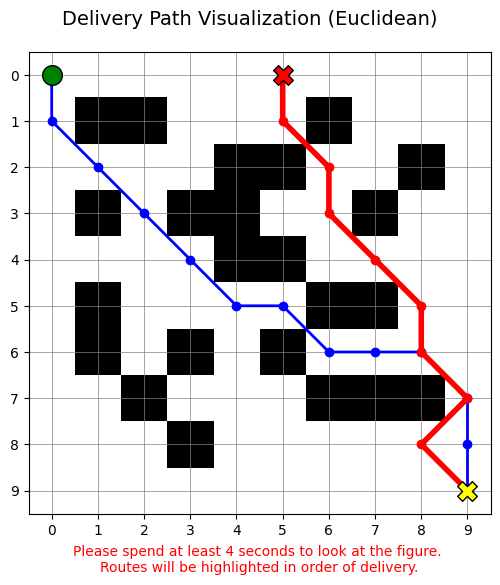

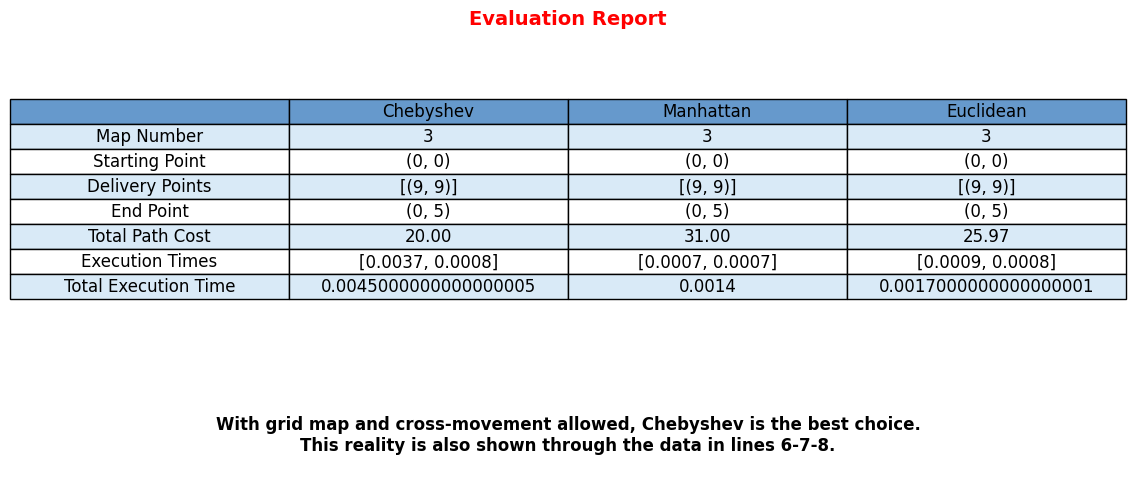

In [13]:
def main():
    display_instructions()  # Show the program instructions

    continue_program = True  # Flag to control the loop

    # Loop to handle multiple runs of the program
    while continue_program:
        map_number, selected_map = ChooseMap()  # Choose a map and get the map data
        
        # If a map was selected
        if selected_map is not None:
            print("\nYou selected:")  # Inform the user of the selected map
            for row in selected_map:
                print(f"[{', '.join(map(str, row))}]")  # Print each row of the selected map

            # Get the size of the map
            map_height = len(selected_map)  # Number of rows
            map_width = len(selected_map[0]) if map_height > 0 else 0  # Number of columns (assuming all rows are of equal length)

            # Define map_limits using the size of the map
            map_limits = (map_width, map_height)

            # Get the starting point from the user
            start = get_point("Enter the starting point (e.g., 0 0): ", map_limits, selected_map, 1)
            
            print(f"Start point: {start}")

            deliveries = []  # Initialize list to collect delivery points

            # Get the number of delivery points from the user
            while True:
                try:
                    num_deliveries = int(input("Enter the number of delivery points: "))
                    if num_deliveries < 1:
                        raise ValueError("The number of delivery points must be at least 1.")
                    break
                except ValueError as e:
                    print(f"Invalid input: {e}. Please try again.")

            # Collect each delivery point from the user
            for i in range(num_deliveries):
                if i != num_deliveries - 1:  # Check the endpoint for user-friendly message
                    delivery_point = get_point("Enter a delivery point (e.g., 3 4): ", map_limits)
                    print(f"Delivery point entered: {delivery_point}")  # Print the entered delivery point
                else:
                    delivery_point = get_point("Enter a end point (e.g., 3 4): ", map_limits)
                    print(f"End point entered: {delivery_point}")  # Print the entered end point
                deliveries.append(delivery_point)  # Add to deliveries list

            # Create a CityMap object with the selected map and points
            city_map = CityMap(
                map_matrix=selected_map,  # Use selected map data
                start=start,  # Starting point
                deliveries=deliveries  # List of delivery points
            )

            # Initialize variables for tracking delivery progress
            current_location = city_map.start  # Starting location
            execution_times = {'Chebyshev': [], 'Manhattan': [], 'Euclidean': []}  # List of execution times
            paths = {'Chebyshev': [], 'Manhattan': [], 'Euclidean': []}  # List of paths taken
            path_costs = {'Chebyshev': 0, 'Manhattan': 0, 'Euclidean': 0}  # Initial path costs
            failed_paths = {'Chebyshev': [], 'Manhattan': [], 'Euclidean': []}  # List of failed paths
            total = {'Chebyshev': 0, 'Manhattan': 0, 'Euclidean': 0}  # Total costs

            # Define heuristics
            heuristics = {
                'Chebyshev': Chebyshev,
                'Manhattan': manhattan,
                'Euclidean': euclidean
            }

            # Process each delivery using different heuristics
            for name, heuristic in heuristics.items():
                path_costs[name], paths[name], execution_times[name], failed_paths[name] = process_deliveries(city_map, heuristic, name)  # total_path_cost, paths, execution_times, failed_paths
            
            # Sum up the total execution times for each heuristic
            total_execution_times = {key: sum(values) for key, values in execution_times.items()}

            # Visualize and handle each path and failed path
            for name, heuristic in heuristics.items():
                if paths.get(name):
                    visualize_delivery_path(city_map, paths[name], name)
                if failed_paths.get(name):
                    unable_to_visualize(name, failed_paths[name])   
                    
            # Generate a report based on the evaluation
            generate_evaluation_report(map_number, city_map, execution_times, path_costs, total_execution_times)
            # (map_number, city_map, execution_times, paths, path_costs              
            
            # Ask user if they want to continue with another map
            continue_choice = int(input("Press '1' to continue with another map, '0' to stop: "))
            if continue_choice == 0:
                continue_program = False  # Exit loop if user chooses to stop

# Call main function if running this script
if __name__ == "__main__":
    main()

## a. Program Instructions and Loops Initialization


<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: -10px; line-height: 1.7;">- The <strong>main()</strong> function will initially display a short introduction as well as some symbols that the map will use using the <strong>'display_instructions()'</strong> function <i>(part 2)</i>.</p>

```python
    display_instructions()  # Show the program instructions
```

<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: -10px; line-height: 1.7; margin-right: 30px">- In addition, the program allows the drone to continue selecting a new map when the journey is completed. The variable <strong>'continue_program'</strong> is created to manage this, the value <strong>True</strong> is initialized to help the processes in the while loop continue.</p>

<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: -10px; line-height: 1.7; margin-right: 30px">- After all the processing and storing of the itinerary in the loop, the program will ask the user if they want to continue the exploration process. To simplify the problem, 1 will represent yes, while 0 represents no. As soon as the input is received, the program will change the value of <strong>'continue_program'</strong> if the user wants to stop the exploration process.</p>

```python
    continue_program = True # Flag to control the loop

    # Loop to handle multiple runs of the program
    while continue_program:
        # Path-finding, visualization, report code

        # Ask user if they want to continue with another map
        continue_choice = int(input("Press '1' to continue with another map, '0' to stop: "))
        if continue_choice == 0:
                continue_program = False  # Exit loop if user chooses to stop
```

## b. Data Structure Initialization

<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: -5px; line-height: 1.7; margin-right: 30px">- The first step after the loop starts is to call the <strong>ChooseMap()</strong> function <i>(part 3)</i>. From here, the map number (<strong>'map_number'</strong>) and the map matrix (<strong>'selected_map'</strong>) will receive the return values ​​from the function. Then, the path finding step will be performed.</p>

```python
        map_number, selected_map = ChooseMap() # Choose a map and get the map data
```
<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: 8px; line-height: 1.7; margin-right: 30px">- If the <strong>'selected_map'</strong> variable receives a value successfully from the <strong>ChooseMap()</strong> function <i>(part 3)</i>, the program will first print out the selected map to visualize the map, which is convenient for the node selection process.</p>

```python
                print("\nYou selected:")  # Inform the user of the selected map
                for row in selected_map:
                        print(f"[{', '.join(map(str, row))}]") # Print each row of the selected map
```
<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: -10px; line-height: 1.7; margin-right: 30px">- Moreover, an interesting feature developed in the program is the ability for users to <storng>select multiple delivery points in a trip</strong> to increase the flexibility and create a reliable environment for the A* algorithm.</p>

<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: -10px; line-height: 1.7; margin-right: 30px">- Looking at the newly printed map, the user will easily select the starting point, the number of delivery points (including the end point) as well as the coordinates of each point. Each coordinate will be checked by the <strong>get_point()</strong> function <i>(part 6a)</i> before being added to the delivery list in order by the system.</p>

```python
            # Get the size of the map
            map_height = len(selected_map)  # Number of rows
            map_width = len(selected_map[0]) if map_height > 0 else 0  # Number of columns (assuming all rows are of equal length)

            # Define map_limits using the size of the map
            map_limits = (map_width, map_height)

            # Get the starting point from the user
            start = get_point("Enter the starting point (e.g., 0 0): ", map_limits, selected_map, 1)
            
            print(f"Start point: {start}")

            deliveries = []  # Initialize list to collect delivery points

            # Get the number of delivery points from the user
            while True:
                try:
                    num_deliveries = int(input("Enter the number of delivery points: "))
                    if num_deliveries < 1:
                        raise ValueError("The number of delivery points must be at least 1.")
                    break
                except ValueError as e:
                    print(f"Invalid input: {e}. Please try again.")

            # Collect each delivery point from the user
            for i in range(num_deliveries):
                if i != num_deliveries - 1:  # Check the endpoint for user-friendly message
                    delivery_point = get_point("Enter a delivery point (e.g., 3 4): ", map_limits)
                    print(f"Delivery point entered: {delivery_point}")  # Print the entered delivery point
                else:
                    delivery_point = get_point("Enter a end point (e.g., 3 4): ", map_limits)
                    print(f"End point entered: {delivery_point}")  # Print the entered end point
                deliveries.append(delivery_point)  # Add to deliveries list
```

<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: -10px; line-height: 1.7; margin-right: 30px">- After receiving all the information, an object named <strong>city_map</strong> will be created including a 2D map, the starting point and a list of delivery points (including the ending point).</p>

```python
            # Create a CityMap object with the selected map and points
            city_map = CityMap(
                map_matrix=selected_map,  # Use selected map data
                start=start,  # Starting point
                deliveries=deliveries  # List of delivery points
            )
```

<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: -10px; line-height: 1.7; margin-right: 30px">- Before performing the path finding process by calling the <strong>process_deliveries()</strong> function, a series of dictionaries are initialized including: <i>execution_times, paths, path_costs, failed_paths, total</i> with an empty data list. This is ready to receive the return value from the <strong>process_deliveries()</strong> function to highlight the difference between the three heuristic functions. On the other hand, a <i>heuristics</i> dictionary is also created to contain a list of computational functions.</p>

```python
            # Initialize variables for tracking delivery progress
            execution_times = {'Chebyshev': [], 'Manhattan': [], 'Euclidean': []}  # List of execution times
            paths = {'Chebyshev': [], 'Manhattan': [], 'Euclidean': []}  # List of paths taken
            path_costs = {'Chebyshev': 0, 'Manhattan': 0, 'Euclidean': 0}
            failed_paths = {'Chebyshev': [], 'Manhattan': [], 'Euclidean': []}
            total = {'Chebyshev': 0, 'Manhattan': 0, 'Euclidean': 0}
            
            heuristics = {
                'Chebyshev': Chebyshev,
                'Manhattan': manhattan,
                'Euclidean': euclidean
            }
```

## c. Path-finding Process

<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: -10px; line-height: 1.7; margin-right: 30px">- For each heuristic function, the <strong>process_deliveries()</strong> function will be called to return the values ​​including the path and related data.</p>

<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: -10px; line-height: 1.7; margin-right: 30px">- Then, the total delivery time will be calculated for each item in the <strong>execution_times</strong> dictionary.</p>

```python
            # Process each delivery
            for name, heuristic in heuristics.items():
                path_costs[name], paths[name],  execution_times[name], failed_paths[name] = process_deliveries(city_map, heuristic, name)
            
            total_execution_times = {key: sum(values) for key, values in execution_times.items()}
```

## d. Visualization and Evaluation
<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: -10px; line-height: 1.7; margin-right: 30px">- After finding the path, the machine will proceed to visualize the path for each item in the <strong>heuristics</strong> dictionary. If the path is not empty, the program will call the <strong>visualize_delivery_path()</strong> function, otherwise it will call the <strong>unable_to_visualize()</strong> function, these are the functions discussed in <i>section 6b</i>.</p>

<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: -10px; line-height: 1.7; margin-right: 30px">- Finally, the function will generate a report that provides a clear picture of the trip information, performance for each delivery segment as well as for the entire delivery trips, by calling the <strong>generate_evaluation_report()</strong> function.</p>

```python
            for name, heuristic in heuristics.items():
                if paths.get(name):
                    visualize_delivery_path(city_map, paths[name], name)
                if failed_paths.get(name):
                    unable_to_visualize(name, failed_paths[name])   
                    
            generate_evaluation_report(map_number, city_map, execution_times, path_costs, total_execution_times)
```

# 9. ADDITIONAL EXPLANATIONS and INSIGHTS
## a. Intrucstion

<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: -10px; line-height: 1.7; margin-right: 30px">- To run the code, click on the cell and press Ctrl + Enter, or click on the run button to the left of the cell.</p>

<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: -10px; line-height: 1.7; margin-right: 30px"> - If you want to test the whole program, you can click <strong>Run All</strong> located on the top left. <strong><span style="color: red; text-transform: uppercase;">DO NOT</span></strong> Click The Run Code Button In The Right Corner Of The Screen</p>

<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: -10px; line-height: 1.7;">- If the markdown cells are in text editing mode, press Ctrl + Enter to switch to view mode.</p>

<p style="text-align: justify; font-size:16px; margin-left: 20px; margin-top: -10px; line-height: 1.7;  margin-right: 30px">- If cell outputs stops displaying output and says: "<i>- Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...</i>" => Choose text editor (easier to see than scrollable element).</p>

## b. Reflection
<div style="text-align: left; font-size: 18px; margin-top: 6px; margin-left: 20px;">
    <strong>i. Strengths</strong>
</div>

<p style="text-align: justify; font-size:16px; margin-left: 40px; margin-top: 8px; line-height: 1.7; margin-right: 30px">- Clear Structure: The large program is divided into small classes and rows (CityMap, astar, ChooseMap, visualize_delivery_path,...), each component has its own function to ensure easy understanding and maintenance.</p>

<p style="text-align: justify; font-size:16px; margin-left: 40px; margin-top: -10px; line-height: 1.7; margin-right: 30px">- A* algorithm and Heuristic function selection: the program has selected the heuristic function with reasonable reasons combined with A* algorithm to provide the shortest path finding solution.</p>

<p style="text-align: justify; font-size:16px; margin-left: 40px; margin-top: -10px; line-height: 1.7; margin-right: 30px">- User-friendly: Actively display the user guide, give friendly messages to help users easily understand the program approach.</p>

<p style="text-align: justify; font-size:16px; margin-left: 40px; margin-top: -10px; line-height: 1.7; margin-right: 30px">- Overview evaluation: At the end of the program, the overview evaluation with visualized route map provides an overview for evaluating the performance of the challenge solution.</p>

<div style="text-align: left; font-size: 18px; margin-top: 6px; margin-left: 20px;">
    <strong>ii. Weaknesses and Improvement Suggestions</strong>
</div>

<p style="text-align: justify; font-size:16px; margin-left: 40px; margin-top: 8px; line-height: 1.7; margin-right: 30px">- Below are some weaknesses and suggestions for improvement. However, due to limitations in knowledge and time, some suggestions will not be implemented.</p>

<p style="text-align: justify; font-size:16px; margin-left: 40px; margin-top: -10px; line-height: 1.7; margin-right: 30px">- Extensibility: Current functions and classes cannot meet the needs when the amount of data is larger. => Use modules or add classes to improve the situation.</p>

<p style="text-align: justify; font-size:16px; margin-left: 40px; margin-top: -10px; line-height: 1.7; margin-right: 30px">- Visualization: Too many figures => Although this is an advanced feature, it can still be enhanced by using three differently color to show heuristic functions' paths on the same figure, improving notification when path is not found..</p>

# 10. REFERENCE

[1] N. Q. Tran, "Assignment 2 - OPTION A (PROGRAMMING): Classical AI," Canvas. Accessed Aug. 4, 2024. [Online]. Available: https://rmit.instructure.com/courses/138595/assignments/969572

[2] S. J. Russell, <i>Artificial Intelligence: A Modern Approach</i>, 4th ed. Upper Saddle River, NJ, U.S.: Pearson Education, 2021.